In [19]:
 # Run the following command on anaconda powershell prompt or the windows command prompt
    #To install the dependencies
"""
  python -m pip install --upgrade pip
  python -m pip install cmake
  python -m pip install dlib 
  pip install opencv-python
  pip install skimage
  pip install face_recognition
"""

'\n python -m pip install --upgrade pip\n python -m pip install cmake\n python -m pip install dlib \n pip install opencv-python\n pip install skimage\n pip install face_recognition\n'

In [20]:
#Importing the necessary libraries
import face_recognition
import cv2
import numpy as np
from matplotlib.patches import Rectangle,Circle,Polygon
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
from face_recognition import face_encodings,face_locations,face_landmarks
from scipy.spatial import distance
%matplotlib inline

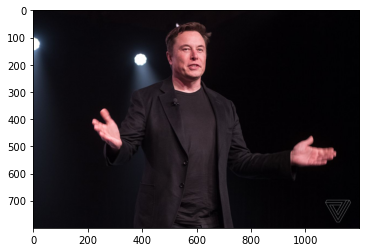

In [21]:
image = cv2.imread('Elon_musk.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)


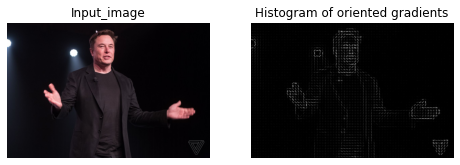

In [22]:
#HOG features
image = cv2.imread('Elon_musk.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image = hog(image,orientations=8,pixels_per_cell=(16,16),
                   cells_per_block=(1,1),visualize=True,multichannel=True)

#plot input and hog image
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input_image')

#Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')
plt.show()

In [23]:
face_locations = face_locations(image)
number_of_faces = len(face_locations)
print("Found {} face(s) in the input_image".format(number_of_faces))

Found 1 face(s) in the input_image


A face is located at the pixel location Top: 526, Left: 110, Bottom: 655, Right: 239


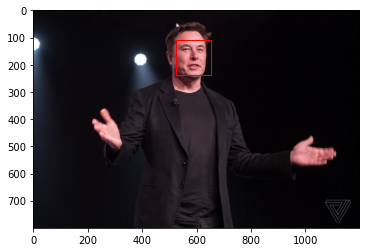

In [24]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
    top,right,bottom,left = face_location 
    x,y,w,h = left,top,right,bottom
    print("A face is located at the pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))
  
    rect = Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
#show output image
plt.show()

In [25]:
#Load the known images

image = cv2.imread('Elon_musk.jpg')
Elon = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('RDJ.jpg')
Robert = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('matt_damon.jpg')
Damon = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('Unkown.jpg')
Madelaine = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [26]:
#Get the face encoding of each person and label the encoding

Elon_encoding = face_encodings(Elon)[0]
Robert_encoding = face_encodings(Robert)[0]
Damon_encoding = face_encodings(Damon)[0]
Madelaine_encoding = face_encodings(Madelaine)[0] 
#Create a database  of all known face encodings
known_face_encodings = [
    Elon_encoding,
    Robert_encoding,
    Damon_encoding,
    Madelaine_encoding 
]


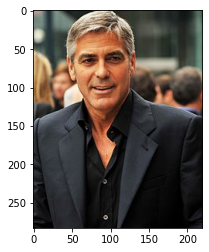

In [27]:
#Load the dataset you want to check
#let us load a photo that is not defined in the encoding list
image = cv2.imread('george clooney.jpg')
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
#Get face encodings for any people in the picture
unknown_face_encodings = face_encodings(unknown_image)

In [28]:
# To test if the unkown encoding belongs to the known 3 people
for unknown_encoding in unknown_face_encodings:
    
    #To compute the Euclidean distance between the features of the images
    results = []
    
    for known_face_encoding in known_face_encodings:
        D = distance.euclidean(known_face_encoding,unknown_face_encodings)
        results.append(D)
    threshold = 0.6
    results = np.array(results) <= threshold
    
   
    name = "Unknown"
    if results[0]:
        name = "Elon Musk"
    elif results[0]:
        name = "Robert Downey Jr"
    elif results[2]:
        name = "Matt Damon"
    elif results[3]:
        name = 'Madelaine Petsch'
    
    print(f"The person in the photo is {name}!")
    

The person in the photo is Unknown!


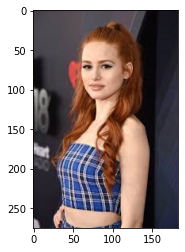

In [29]:
#let us define an image who's encodings are already defined
image_2 = cv2.imread('madelaine.jpg')
unknown_image_2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image_2)
unknown_face_encodings_2 = face_encodings(unknown_image_2)

In [30]:
# To test if the model identifies the encoding belongs to the known 4 people
for unknown_encoding  in unknown_face_encodings_2:
    
    #To compute the Euclidean distance between the features of the images
    results = []
    
    for known_face_encoding in known_face_encodings:
        D = distance.euclidean(known_face_encoding,unknown_face_encodings_2)
        results.append(D)
    threshold = 0.6
    results = np.array(results) <= threshold
    
   
    name = "Unknown"
    if results[0]:
        name = "Elon Musk"
    elif results[0]:
        name = "Robert Downey Jr"
    elif results[2]:
        name = "Matt Damon"
    elif results[3]:
        name = 'Madelaine Petsch'
    
    print(f"The person in the photo is {name}!")
    

The person in the photo is Madelaine Petsch!


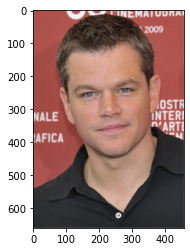

In [31]:
image = cv2.imread('matt_damon.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [32]:
#To find all of the features of the image
face_landmarks_list = face_landmarks(image)

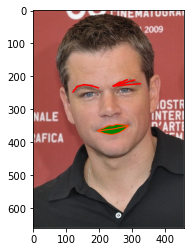

In [33]:
plt.imshow(image)
ax = plt.gca()
for face_landmarks in face_landmarks_list:
    #Draw a line over the eyebrows
    left_eyebrow_ps = face_landmarks['left_eyebrow']
    pre_x,pre_y = left_eyebrow_ps[0]
    for (x,y) in left_eyebrow_ps[1:]:
        l = Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
        pre_x,pre_y = x,y
    
    right_eyebrow_ps = face_landmarks['right_eyebrow']
    pre_x,pre_y = right_eyebrow_ps[0]
    for (x,y) in right_eyebrow_ps[1:]:
        l = Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
    
    p = Polygon(face_landmarks['top_lip'],facecolor='green',edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'],facecolor='green',edgecolor='orangered')
    ax.add_patch(p)
    
    plt.show()
    